# Data Analysis on a Whatsapp Group Chat

## Introduction
Utilizing Python and Data analysis libraries, I have done an analysis of a whatsapp groupchat called "12 BRIGADE ARMY BARRACKS' CORPERS", the group chat for corp members who are currently serving or have served in 12 brigrade, Nigerian Army. 

## Objectives
- Identify peak hours.
- Explore the most active participants in the group.
- Identify chat activity.
- Uncover the most active days and months.

## Data Source
The analysis is based on exported chat data from "12 BRIGADE ARMY BARRACKS' CORPERS" WhatsApp group between Thursday 17th August, 2023 and Monday 12th December, 2023. The dataset includes information about message timestamps, authors, and message content.

## Import Libraries

In [2]:
import re
import regex
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import calendar
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

## Extract Useful Info

In [3]:
def startsWithDateAndTimeIOS(s):
    pattern = r"^\[\d{2}/\d{2}/\d{4}, \d{2}:\d{2}:\d{2}\] "
    result = re.match(pattern, s)
    return bool(result)

In [4]:
def FindAuthorIOS(s):
    patterns = [
        '([w]+):',
        '([w]+[s]+[w]+):',
        '([w]+[s]+[w]+[s]+[w]+):',
        '([+]d{2} d{5} d{5}):',
        '([+]d{2} d{3} d{3} d{4}):',
        '([w]+)[u263a-U0001f999]+:',
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [5]:
def extractWhatsAppDataIOS(file_path):
    parsed_data = []
    
    with open(file_path, encoding="utf-8") as fp:
        message_buffer = []
        date, time, author = None, None, None

        while True:
            line = fp.readline()
            if not line:
                break
            line = line.strip()

            if startsWithDateAndTimeIOS(line):
                if len(message_buffer) > 0:
                    parsed_data.append([date, time, author, ' '.join(message_buffer)])
                message_buffer.clear()
                date, time, author, message = getDataPointIOS(line)
                message_buffer.append(message)
            else:
                if not line.startswith('['):
                    message_buffer.append(line)

    if len(message_buffer) > 0:
        parsed_data.append([date, time, author, ' '.join(message_buffer)])

    columns = ['Date', 'Time', 'Author', 'Message']
    df = pd.DataFrame(parsed_data, columns=columns)

    return df

def getDataPointIOS(line):
    pattern = r"^\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] (.+?): (.+)$"
    match = re.match(pattern, line)

    if match:
        date = match.group(1)
        time = match.group(2)
        author = match.group(3)
        message = match.group(4)
        return date, time, author, message
    else:
        return None, None, None, None

## Loading Dataset

In [374]:
file_path = "C:\\Users\\pc\\Desktop\\AF py\\Whatsapp\\_chat.txt"
df_original = extractWhatsAppDataIOS(file_path)

In [375]:
df = df_original.copy()

In [376]:
df.head()

,Date,Time,Author,Message
0,17/08/2023,19:44:22,12 BRIGADE ARMY BARRACKS' CORPERS,‎Messages and calls are end-to-end encrypted. ...
1,17/08/2023,19:44:22,Maryam,‎Maryam created group “NEW CHARI MAIGUMERI BAR...
2,17/08/2023,19:44:22,12 BRIGADE ARMY BARRACKS' CORPERS,‎Maryam added you
3,17/08/2023,19:53:05,Samuel Thomas,‎Samuel Thomas changed the group name to “12 B...
4,17/08/2023,20:00:29,12 BRIGADE ARMY BARRACKS' CORPERS,"‎Samuel Thomas added Abas, Chika, and 8 others..."


## Data Wrangling

In [377]:
df.head()

,Date,Time,Author,Message
0,17/08/2023,19:44:22,12 BRIGADE ARMY BARRACKS' CORPERS,‎Messages and calls are end-to-end encrypted. ...
1,17/08/2023,19:44:22,Maryam,‎Maryam created group “NEW CHARI MAIGUMERI BAR...
2,17/08/2023,19:44:22,12 BRIGADE ARMY BARRACKS' CORPERS,‎Maryam added you
3,17/08/2023,19:53:05,Samuel Thomas,‎Samuel Thomas changed the group name to “12 B...
4,17/08/2023,20:00:29,12 BRIGADE ARMY BARRACKS' CORPERS,"‎Samuel Thomas added Abas, Chika, and 8 others..."


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     2072 non-null   object
 1   Time     2072 non-null   object
 2   Author   2072 non-null   object
 3   Message  2072 non-null   object
dtypes: object(4)
memory usage: 64.9+ KB


In [379]:
df[df['Author']== "12 BRIGADE ARMY BARRACKS'  CORPERS"]

,Date,Time,Author,Message
0,17/08/2023,19:44:22,12 BRIGADE ARMY BARRACKS' CORPERS,‎Messages and calls are end-to-end encrypted. ...
2,17/08/2023,19:44:22,12 BRIGADE ARMY BARRACKS' CORPERS,‎Maryam added you
4,17/08/2023,20:00:29,12 BRIGADE ARMY BARRACKS' CORPERS,"‎Samuel Thomas added Abas, Chika, and 8 others..."
5,17/08/2023,20:02:06,12 BRIGADE ARMY BARRACKS' CORPERS,‎Samuel Thomas added Barakat and Chrisblinks C...
6,17/08/2023,20:07:01,12 BRIGADE ARMY BARRACKS' CORPERS,‎Samuel Thomas added Praise and Tolulope Arewa
7,17/08/2023,20:45:38,12 BRIGADE ARMY BARRACKS' CORPERS,"‎Samuel Thomas added Clement , Nelly Favor, an..."
9,17/08/2023,20:54:25,12 BRIGADE ARMY BARRACKS' CORPERS,"‎Samuel Thomas added Bunmi, Debby, and 5 other..."
148,24/08/2023,11:04:18,12 BRIGADE ARMY BARRACKS' CORPERS,‎Samuel Thomas added Timothy and ~ ADEX


In [380]:
#drop every row with author name "12 BRIGADE ARMY BARRACKS'  CORPERS"
df = df[df['Author'] != "12 BRIGADE ARMY BARRACKS'  CORPERS"]

In [381]:
df = df.reset_index(drop=True)

In [382]:
df.head()

,Date,Time,Author,Message
0,17/08/2023,19:44:22,Maryam,‎Maryam created group “NEW CHARI MAIGUMERI BAR...
1,17/08/2023,19:53:05,Samuel Thomas,‎Samuel Thomas changed the group name to “12 B...
2,17/08/2023,20:45:56,Lawal KG NYSC Barracks,‎Samuel Thomas added Lawal KG NYSC Barracks
3,17/08/2023,20:56:33,~ Felicia,‎Idris Oladiran added ~ Felicia
4,17/08/2023,21:02:52,Olayinka Maintenance,‎Idris Oladiran added Olayinka Maintenance ‎[1...


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     2064 non-null   object
 1   Time     2064 non-null   object
 2   Author   2064 non-null   object
 3   Message  2064 non-null   object
dtypes: object(4)
memory usage: 64.6+ KB


In [384]:
#convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [385]:
#convert time to datetime format
df['Time'] = pd.to_datetime(df['Time'])

In [386]:
#add a day column
df['Day'] = df['Date'].dt.day_name()

In [387]:
#add an hour column
df['Hour'] = df['Time'].dt.hour

In [388]:
#add a month column
df['Month'] = df['Date'].dt.month

In [389]:
df["Words"] = df['Message'].apply(lambda s : len(s.split(' ')))

In [391]:
df = df[['Date','Day','Month','Time','Hour','Author','Message','Words']]

In [395]:
df['Month'] = df['Month'].map(lambda x: calendar.month_name[x])

In [396]:
df.head()

,Date,Day,Month,Time,Hour,Author,Message,Words
0,2023-08-17,Thursday,August,2023-12-12 19:44:22,19,Maryam,‎Maryam created group “NEW CHARI MAIGUMERI BAR...,8
1,2023-08-17,Thursday,August,2023-12-12 19:53:05,19,Samuel Thomas,‎Samuel Thomas changed the group name to “12 B...,13
2,2023-08-17,Thursday,August,2023-12-12 20:45:56,20,Lawal KG NYSC Barracks,‎Samuel Thomas added Lawal KG NYSC Barracks,7
3,2023-08-17,Thursday,August,2023-12-12 20:56:33,20,~ Felicia,‎Idris Oladiran added ~ Felicia,4
4,2023-08-17,Thursday,August,2023-12-12 21:02:52,21,Olayinka Maintenance,‎Idris Oladiran added Olayinka Maintenance ‎[1...,11


In [397]:
df[df['Message'].str.contains('sticker omitted')]

,Date,Day,Month,Time,Hour,Author,Message,Words
4,2023-08-17,Thursday,August,2023-12-12 21:02:52,21,Olayinka Maintenance,‎Idris Oladiran added Olayinka Maintenance ‎[1...,11
15,2023-08-17,Thursday,August,2023-12-12 21:57:29,21,Clement,"Mariam dn change parade ooo, she wan clear our...",20
17,2023-08-17,Thursday,August,2023-12-12 23:52:49,23,Mayowa,‎Mayowa joined using this group's invite link ...,12
35,2023-08-19,Saturday,August,2023-12-12 16:05:00,16,Mariam,"4:30 keh😭😭😭 I just wan sleep😫 ‎[19/08/2023, 1...",20
41,2023-08-19,Saturday,August,2023-12-12 17:33:57,17,Samuel Thomas,"Continue ‎[19/08/2023, 17:34:41] ~ TERRY-G-ZUS...",6
...,...,...,...,...,...,...,...,...
2041,2023-12-10,Sunday,December,2023-12-12 22:02:37,22,~ TERRY-G-ZUS,"Go and hide ur ugly face my boy ‎[10/12/2023, ...",13
2044,2023-12-10,Sunday,December,2023-12-12 22:03:49,22,~ Future Leader,"Nah so o ‎[10/12/2023, 22:03:51] ~ SLEEK~WORLD...",8
2047,2023-12-10,Sunday,December,2023-12-12 22:04:49,22,~ SLEEK~WORLD,"Talk ham again ‎[10/12/2023, 22:05:04] ~ SLEEK...",8
2050,2023-12-10,Sunday,December,2023-12-12 22:06:29,22,~ Future Leader,"Abi now ‎[10/12/2023, 22:09:27] ~ SLEEK~WORLD:...",7


In [398]:
#drop rows that are not properly loaded
df = df[~df['Message'].str.contains('sticker omitted')]

In [399]:
df = df.reset_index(drop = True)

In [400]:
df.head()

,Date,Day,Month,Time,Hour,Author,Message,Words
0,2023-08-17,Thursday,August,2023-12-12 19:44:22,19,Maryam,‎Maryam created group “NEW CHARI MAIGUMERI BAR...,8
1,2023-08-17,Thursday,August,2023-12-12 19:53:05,19,Samuel Thomas,‎Samuel Thomas changed the group name to “12 B...,13
2,2023-08-17,Thursday,August,2023-12-12 20:45:56,20,Lawal KG NYSC Barracks,‎Samuel Thomas added Lawal KG NYSC Barracks,7
3,2023-08-17,Thursday,August,2023-12-12 20:56:33,20,~ Felicia,‎Idris Oladiran added ~ Felicia,4
4,2023-08-17,Thursday,August,2023-12-12 21:46:26,21,Bunmi,Make I add officers to d group,7


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1824 non-null   datetime64[ns]
 1   Day      1824 non-null   object        
 2   Month    1824 non-null   object        
 3   Time     1824 non-null   datetime64[ns]
 4   Hour     1824 non-null   int64         
 5   Author   1824 non-null   object        
 6   Message  1824 non-null   object        
 7   Words    1824 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 114.1+ KB


## Exploratory Data Analysis

In [402]:
print(f"Total number of messages: {df.shape[0]}")

Total number of messages: 1824


In [403]:
df.sort_values("Words",ascending=False).head(10)

,Date,Day,Month,Time,Hour,Author,Message,Words
1027,2023-10-24,Tuesday,October,2023-12-12 08:48:04,8,Clement,The Speech of the Prime Minister of Israel Ben...,743
1673,2023-11-29,Wednesday,November,2023-12-12 06:43:31,6,~ TERRY-G-ZUS,Only Tears 😭😭😭 1-The United States has confir...,678
226,2023-09-01,Friday,September,2023-12-12 07:41:18,7,Mayowa,"*SOME NIGERIAN NEWSPAPER HEADLINES+, 01/09/202...",584
921,2023-10-14,Saturday,October,2023-12-12 11:02:36,11,Clement,*Top Applications to Apply - October 2023* 👇👇...,489
1258,2023-11-07,Tuesday,November,2023-12-12 14:24:09,14,Olayinka Maintenance,"Yesterday, I went out with the Men of the Nige...",410
1774,2023-12-09,Saturday,December,2023-12-12 16:28:22,16,~ Blaire💙,*RE:2023 BATCH'A'STREAM I WINDING-UP/PASSING-O...,229
1033,2023-10-24,Tuesday,October,2023-12-12 11:00:45,11,~ TERRY-G-ZUS,*Enjoy this Joke* 😁😁😁😁😁 A girl was with her f...,206
519,2023-09-29,Friday,September,2023-12-12 17:52:29,17,Samuel Thomas,"FORGIVENESS In hearts, forgiveness blooms ane...",161
155,2023-08-28,Monday,August,2023-12-12 15:31:28,15,Chrisblinks Copper,*SEPTEMBER BIOMETRIC CLEARANCE* *LOCATION ...,154
376,2023-09-09,Saturday,September,2023-12-12 20:18:52,20,Maryam,🚨 *THIS IS A PUBLIC SERVICE ANNOUNCEMENT BROUG...,152


### Word Cloud

In [404]:
text = " ".join(review for review in df.Message)
len(text)

In [409]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

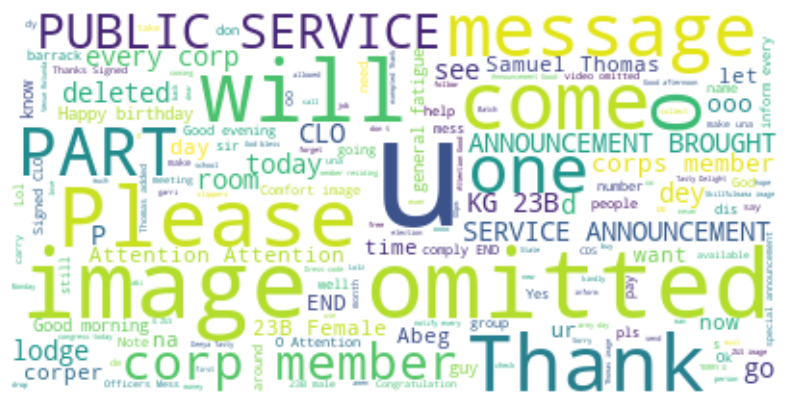

In [410]:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Most Active Users

In [412]:
#top ten most active users
top_ten_active_users = df['Author'].value_counts().head(10)
top_ten_active_users =  top_ten_active_users.reset_index()
top_ten_active_users.columns = ['Author', 'No. of messages']

In [413]:
top_ten_active_users

,Author,No. of messages
0,~ TERRY-G-ZUS,271
1,~ ngaladimaishaya9090,149
2,Samuel Thomas,131
3,Maryam,105
4,~ Pearl 😎,96
5,~ BIG'KHALIFA 👑🖤💯✨,90
6,Chrisblinks Copper,86
7,Olayinka Maintenance,65
8,Mayowa,59
9,~ Dr. Tobi,57


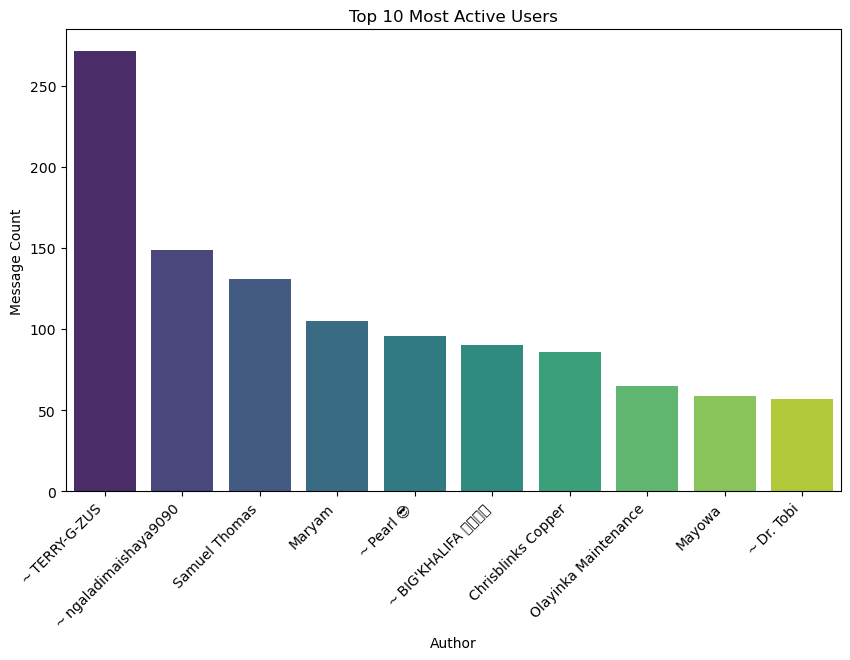

In [414]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Author',y='No. of messages', data=top_ten_active_users, palette="viridis")
plt.title('Top 10 Most Active Users')
plt.xlabel('Author')
plt.ylabel('Message Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Most Active Days

In [415]:
active_days = df['Day'].value_counts()
active_days = active_days.reset_index()
active_days.columns = ['Day', 'No. of messages']

In [416]:
active_days

,Day,No. of messages
0,Thursday,386
1,Wednesday,291
2,Monday,270
3,Tuesday,249
4,Friday,234
5,Saturday,206
6,Sunday,188


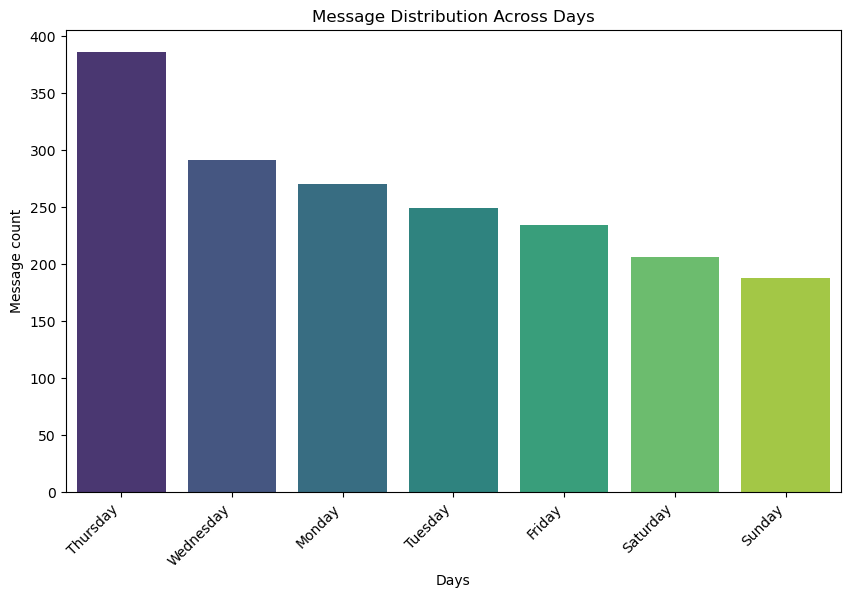

In [417]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day',y='No. of messages',data=active_days, palette="viridis")
plt.title('Message Distribution Across Days')
plt.xlabel('Days')
plt.ylabel('Message count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Time Series Plot for Date

In [418]:
active_date = df['Date'].value_counts().sort_index()

In [419]:
active_date.head()

2023-08-17    15
2023-08-18    11
2023-08-19    13
2023-08-20    12
2023-08-21     2
Name: Date, dtype: int64

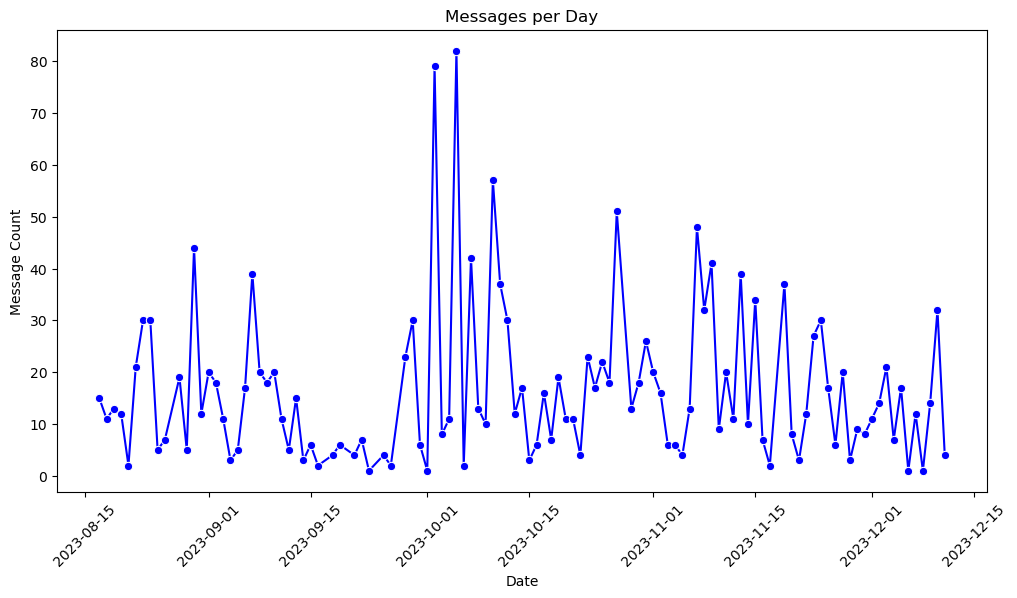

In [420]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=active_date.index, y=active_date.values, marker='o', color='blue')
plt.title('Messages per Day')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.show()

### Activity Heatmap

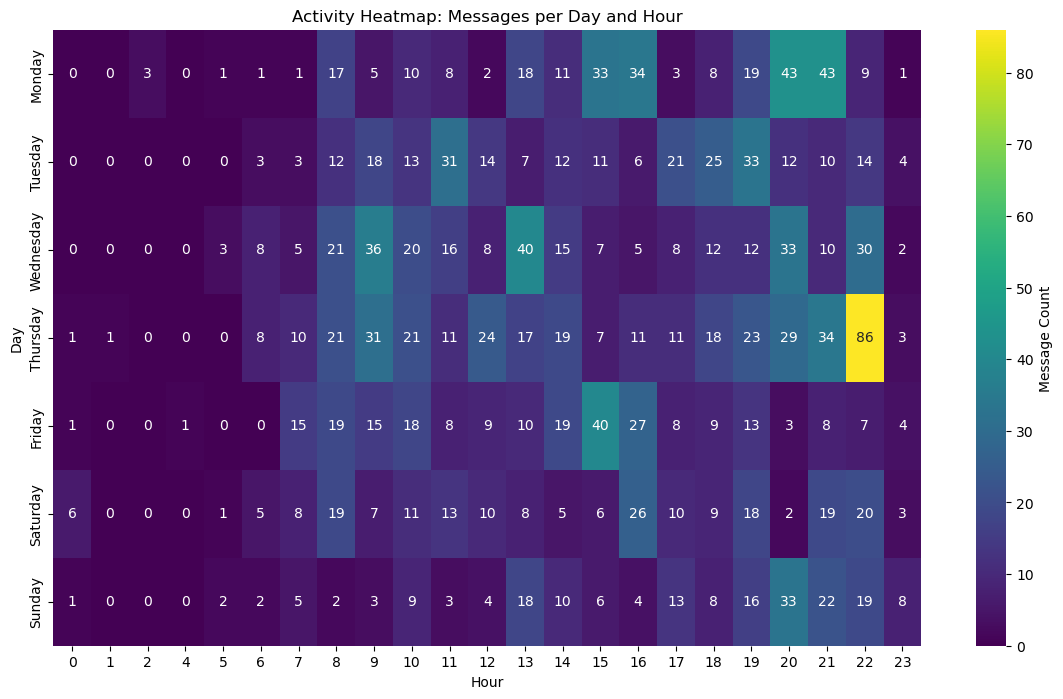

In [421]:
heatmap_data = df.pivot_table(index='Day', columns='Hour', values='Message', aggfunc='count', fill_value=0)

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Message Count'})
plt.title('Activity Heatmap: Messages per Day and Hour')
plt.show()

### Day With Most Activity

In [461]:
daily_message_count = df.groupby(df['Date'].dt.date)['Message'].count().reset_index()

max_date = daily_message_count.loc[daily_message_count['Message'].idxmax(), 'Date']

print(f"Date with highest activity: ({max_date})")

Date with highest activity: (2023-10-05)


### Message Distribution Across Months

In [424]:
monthly_message_count = df['Month'].value_counts().sort_index()
monthly_message_count

August       226
December     134
November     498
October      666
September    300
Name: Month, dtype: int64

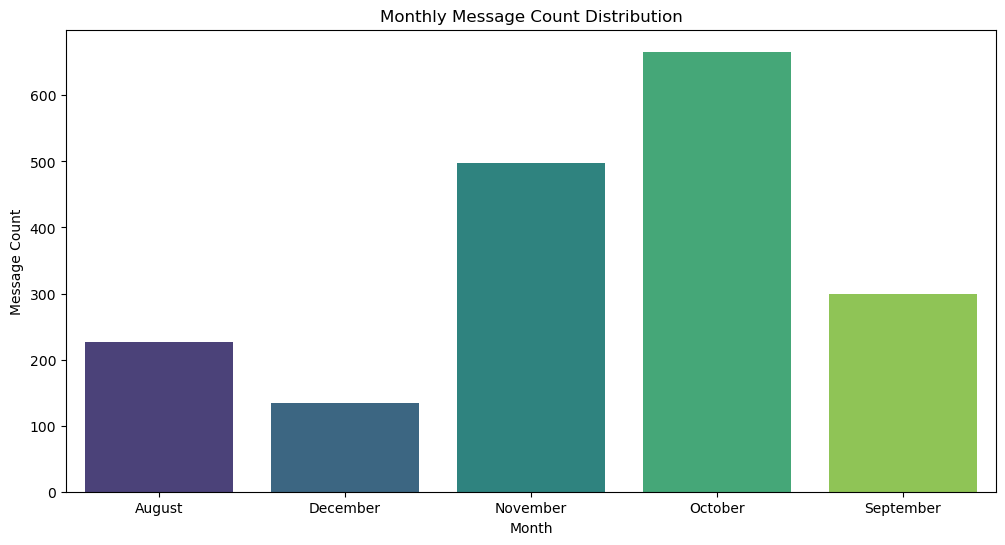

In [429]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_message_count.index, y=monthly_message_count.values, palette='viridis')
plt.title('Monthly Message Count Distribution')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.show()

### Message Distribution by Hour

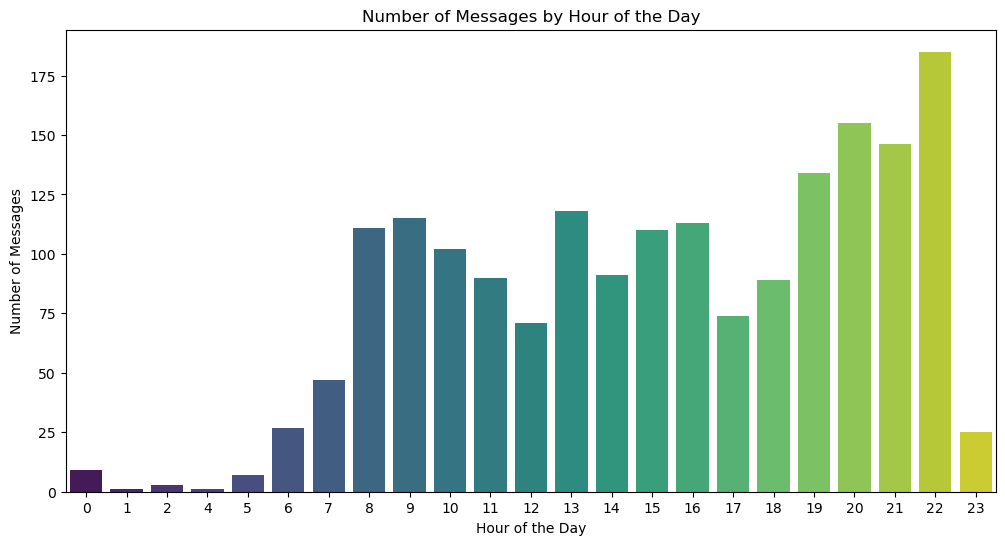

In [433]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Number of Messages by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.show()

In [453]:
df.head()

,Date,Day,Month,Time,Hour,Author,Message,Words
0,2023-08-17,Thursday,August,2023-12-12 19:44:22,19,Maryam,‎Maryam created group “NEW CHARI MAIGUMERI BAR...,8
1,2023-08-17,Thursday,August,2023-12-12 19:53:05,19,Samuel Thomas,‎Samuel Thomas changed the group name to “12 B...,13
2,2023-08-17,Thursday,August,2023-12-12 20:45:56,20,Lawal KG NYSC Barracks,‎Samuel Thomas added Lawal KG NYSC Barracks,7
3,2023-08-17,Thursday,August,2023-12-12 20:56:33,20,~ Felicia,‎Idris Oladiran added ~ Felicia,4
4,2023-08-17,Thursday,August,2023-12-12 21:46:26,21,Bunmi,Make I add officers to d group,7


## Conclusion
In this WhatsApp group chat analysis, I've uncovered valuable insights into the group's communication patterns. Let's summarize our key findings:

### 1. Peak Activity Hours
- The group experience peak activity between 7PM and 10PM

### 2. Peak Day and Month
- The Day of the week with the most activity is Thursday
- The Month with the most activity was October

### 3. Peak Date
- The date that recorded the most activity was Thurday 5th October, 2023

### 4. Most Active Participants
- The most active participants are: TERRY-G-ZUS, ngaladimaishaya9090, Samuel Thomas, Maryam and Pearl

### 5. Content Trend
- The group is often used to pass official announcements

### Recomendations
1. Schedule important announcements should be passed between 7PM and 10PM.
2. Given that Thursdays are the days with the highest activity, consider planning discussions on Thursdays to maximize participation.
3. TERRY-G-ZUS is the best member to reach out to, given they have the most participation in the group.
4. While the group is used for official announcements, encourage participation from all members to ensure a diverse and inclusive environment.